# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## Read the respective Clustered Data

In [2]:
df_dbscan = pd.read_csv('../processed/dbscan.csv')
df_kmeans = pd.read_csv('../processed/kmeans.csv')
df_birch = pd.read_csv('../processed/birch.csv')

In [3]:
df_dbscan.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Total_Spend,Family_Size,Total_Campaigns_Accepted,Age,Cluster
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,1,663,1617,1,0,57,0
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,0,113,27,3,0,60,0
2,Graduation,Partnered,71613.0,26,1,8,2,10,4,0,0,312,776,1,0,49,0
3,Graduation,Partnered,26646.0,26,2,2,0,4,6,0,0,139,53,2,0,30,0
4,PhD,Partnered,58293.0,94,5,5,3,6,5,0,0,161,422,2,0,33,0


In [4]:
df_kmeans.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Total_Spend,Family_Size,Total_Campaigns_Accepted,Age,Cluster
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,1,663,1617,1,0,57,1
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,0,113,27,3,0,60,0
2,Graduation,Partnered,71613.0,26,1,8,2,10,4,0,0,312,776,1,0,49,1
3,Graduation,Partnered,26646.0,26,2,2,0,4,6,0,0,139,53,2,0,30,0
4,PhD,Partnered,58293.0,94,5,5,3,6,5,0,0,161,422,2,0,33,0


In [5]:
df_birch.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Total_Spend,Family_Size,Total_Campaigns_Accepted,Age,BIRCH_Cluster
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,1,663,1617,1,0,57,0
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,0,113,27,3,0,60,0
2,Graduation,Partnered,71613.0,26,1,8,2,10,4,0,0,312,776,1,0,49,0
3,Graduation,Partnered,26646.0,26,2,2,0,4,6,0,0,139,53,2,0,30,0
4,PhD,Partnered,58293.0,94,5,5,3,6,5,0,0,161,422,2,0,33,0


We'll take mean of numerical features for each kind of clustering algorithm. Later, we'll make a radar plot to compare among the clusters.

In [6]:
features =['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'Complain', 'Response', 'Customer_Tenure', 'Total_Spend',
    'Family_Size', 'Total_Campaigns_Accepted', 'Age']

In [7]:
# Group by cluster and compute mean for each feature
dbscan_summary = df_dbscan.groupby('Cluster')[features].mean().round(2)
kmeans_summary = df_kmeans.groupby('Cluster')[features].mean().round(2)
birch_summary = df_birch.groupby('BIRCH_Cluster')[features].mean().round(2)

In [8]:
dbscan_summary.index = [f'DBSCAN_{i}' for i in dbscan_summary.index]
kmeans_summary.index = [f'KMeans_{i}' for i in kmeans_summary.index]
birch_summary.index = [f'BIRCH_{i}' for i in birch_summary.index]

In [9]:
comparison_df = pd.concat([dbscan_summary, kmeans_summary, birch_summary])
display(comparison_df)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Total_Spend,Family_Size,Total_Campaigns_Accepted,Age
DBSCAN_-1,90301.48,49.81,4.33,4.44,5.15,1.96,6.48,0.19,0.15,337.63,599.30,1.78,0.30,51.44
DBSCAN_0,52637.74,49.02,2.31,4.14,2.70,5.93,5.26,0.00,0.15,351.58,622.88,1.95,0.31,45.30
DBSCAN_1,20039.49,47.62,1.72,1.72,0.45,2.75,6.83,0.00,0.04,426.51,67.51,1.74,0.11,36.60
DBSCAN_2,42978.75,51.56,2.50,3.44,1.62,5.38,5.81,1.00,0.00,396.44,313.81,2.31,0.00,47.25
KMeans_0,37664.26,48.74,2.55,2.82,0.81,3.75,6.49,0.01,0.09,339.48,168.78,2.27,0.09,43.53
KMeans_1,71573.93,49.37,2.03,5.76,5.14,8.52,3.77,0.01,0.23,372.14,1187.94,1.52,0.57,47.36
BIRCH_0,52314.27,48.97,2.32,4.09,2.68,5.81,5.31,0.00,0.15,352.86,609.28,1.94,0.30,45.14
BIRCH_1,45242.29,53.05,2.33,3.62,2.05,5.24,5.81,1.00,0.14,422.38,376.43,2.19,0.14,48.90


 ## Radar Plot of clusters by K-Means 

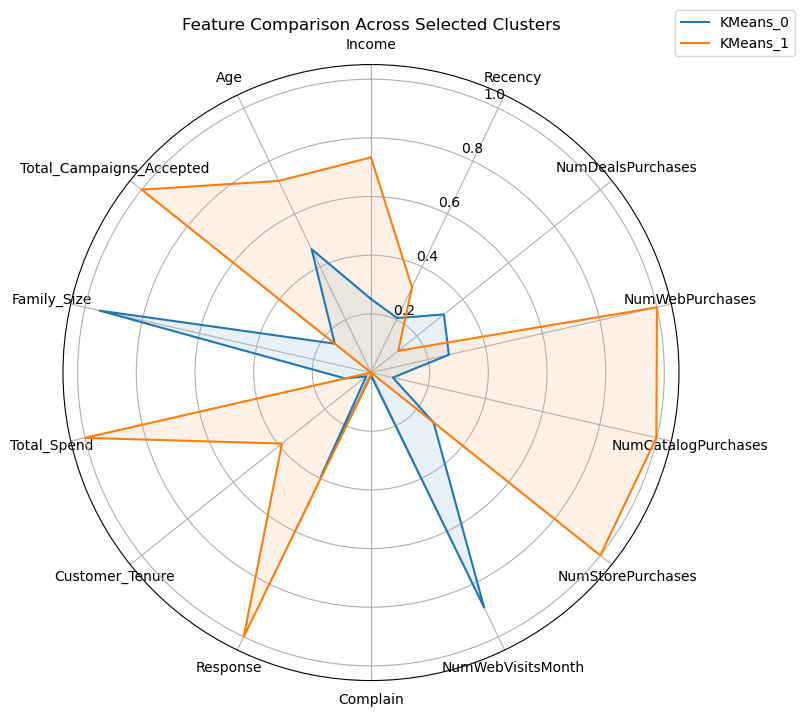

In [10]:
# cluster IDs
selected_clusters = ['KMeans_0', 'KMeans_1']

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(comparison_df[features])
normalized_df = pd.DataFrame(normalized_data, index=comparison_df.index, columns=features)

labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

for cluster_id in selected_clusters:
    values = normalized_df.loc[cluster_id].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cluster_id)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Feature Comparison Across Selected Clusters')
plt.show()


## Radar Plot of Clusters by DBSCAN

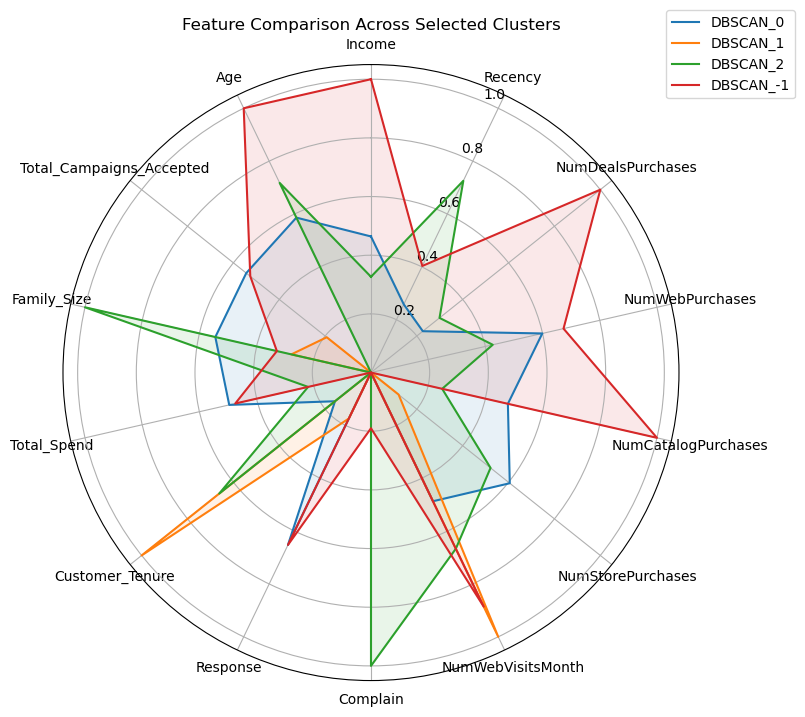

In [11]:
# cluster IDs
selected_clusters = ['DBSCAN_0', 'DBSCAN_1', 'DBSCAN_2', 'DBSCAN_-1']

normalized_data = scaler.fit_transform(comparison_df[features])
normalized_df = pd.DataFrame(normalized_data, index=comparison_df.index, columns=features)

labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

for cluster_id in selected_clusters:
    values = normalized_df.loc[cluster_id].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cluster_id)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Feature Comparison Across Selected Clusters')
plt.show()


## Radar Plot of Clusters by BIRCH

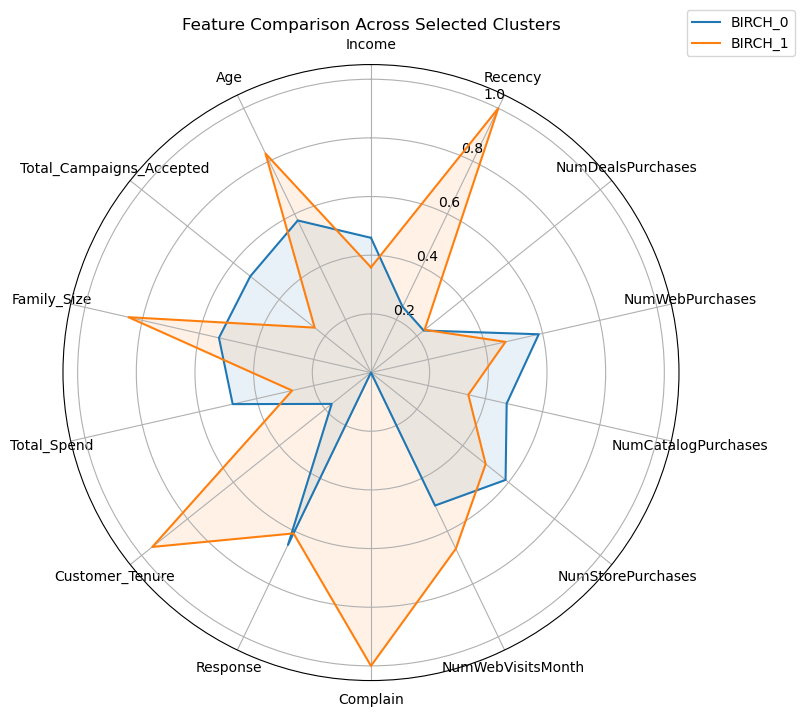

In [28]:
# cluster IDs
selected_clusters = ['BIRCH_0', 'BIRCH_1']

normalized_data = scaler.fit_transform(comparison_df[features])
normalized_df = pd.DataFrame(normalized_data, index=comparison_df.index, columns=features)

labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

for cluster_id in selected_clusters:
    values = normalized_df.loc[cluster_id].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cluster_id)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Feature Comparison Across Selected Clusters')
plt.show()


## Comparison of Clusters formed by each Algorithm

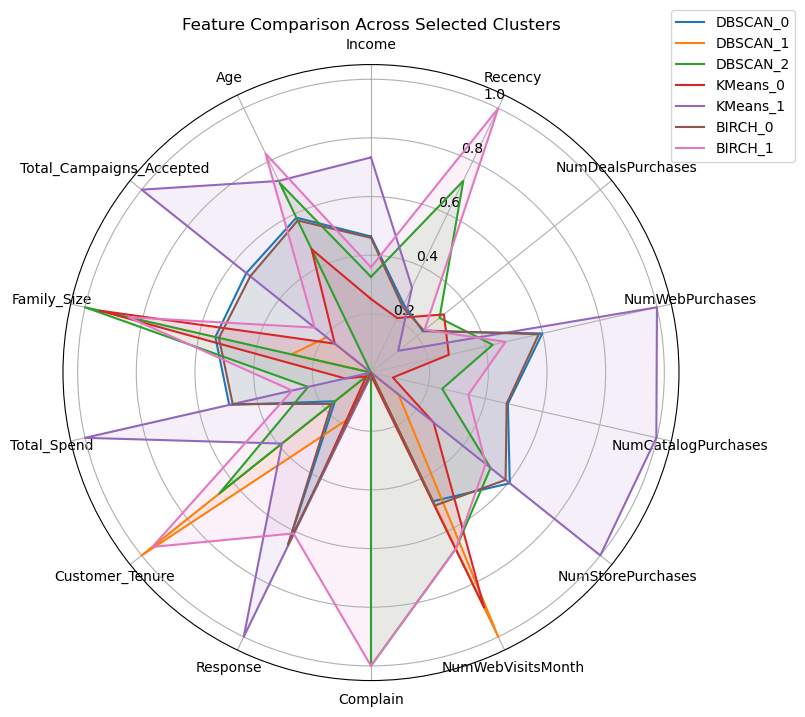

In [26]:
# cluster IDs
selected_clusters = ['DBSCAN_0', 'DBSCAN_1', 'DBSCAN_2', 'KMeans_0', 'KMeans_1', 'BIRCH_0', 'BIRCH_1']

normalized_data = scaler.fit_transform(comparison_df[features])
normalized_df = pd.DataFrame(normalized_data, index=comparison_df.index, columns=features)

labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

for cluster_id in selected_clusters:
    values = normalized_df.loc[cluster_id].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cluster_id)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Feature Comparison Across Selected Clusters')
plt.show()


It seems DBSCAN performs much better at forming seperable clusters compared to the other two algorithms.